In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import statsmodels.api as sm
import utils.DataSplitter
import utils.Sklearn
from utils.ColumnEnum import Columns
from utils.metrics import *

In [2]:
level = 60
line = Columns.line_1A.value
target = Columns.target_passengersBoarding.value

if level == 60:
    agg = 1
elif level == 30:
    agg = 2
elif level == 15:
    agg = 4

df_level = utils.DataSplitter.getTrainData(agglevel=level, diff=False)
df_level_line = df_level[df_level['line'] == line]
df_train, df_val = utils.DataSplitter.performTrainValSplit(df=df_level_line)

X_train = utils.DataSplitter.subsetColumns(df_train, dropCategorical=True, dropLags=True, dropWeather=False, dropCalendar=False, 
                                           dropSpecific=[target, Columns.calendar_Q1.value, Columns.calendar_mon.value]) # avoid multicolinearity
y_train = df_train[target]

X_val = utils.DataSplitter.subsetColumns(df_val, dropCategorical=True, dropLags=True, dropWeather=False, dropCalendar=False, 
                                         dropSpecific=[target, Columns.calendar_Q1.value, Columns.calendar_mon.value]) # avoid multicolinearity
y_val = df_val[target]

print(all(X_train.columns == X_val.columns))
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)
print(X_train.columns)

True
(14680, 27) (14680,) (1840, 27) (1840,)
Index(['peakHour', 'Q2', 'Q3', 'Q4', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun',
       'workdayPlan', 'saturdayPlan', 'sundayAndHolidayPlan', 'summerVacation',
       'fallVacation', 'christmasVacation', 'winterVacation', 'easterVacation',
       'acc_precip', 'bright_sunshine', 'mean_cloud_cover', 'mean_pressure',
       'mean_relative_hum', 'mean_temp', 'mean_wind_speed', 'snow_depth',
       'event'],
      dtype='object')


In [2]:
# for testing
level = 60
line = Columns.line_1A.value
target = Columns.target_passengersBoarding.value

if level == 60:
    agg = 1
elif level == 30:
    agg = 2
elif level == 15:
    agg = 4

df_level = utils.DataSplitter.getTrainData(agglevel=level, diff=False)
df_train = df_level[df_level['line'] == line]

X_train = utils.DataSplitter.subsetColumns(df_train, dropCategorical=True, dropLags=True, dropWeather=False, dropCalendar=False, 
                                           dropSpecific=[target, Columns.calendar_Q1.value, Columns.calendar_mon.value]) # avoid multicolinearity
y_train = df_train[target]

df_train.index = pd.RangeIndex(start=0, stop=df_train.shape[0])
X_train.index = df_train.index
y_train.index = df_train.index


df_level_test = utils.DataSplitter.getTestData(agglevel=level, diff=False)
df_val = df_level_test[df_level_test['line'] == line]

X_val = utils.DataSplitter.subsetColumns(df_val, dropCategorical=True, dropLags=True, dropWeather=False, dropCalendar=False, 
                                           dropSpecific=[target, Columns.calendar_Q1.value, Columns.calendar_mon.value]) # avoid multicolinearity
y_val = df_val[target]

df_val.index = pd.RangeIndex(start = X_train.shape[0], stop = X_train.shape[0] + X_val.shape[0])
X_val.index = df_val.index
y_val.index = df_val.index

print(all(X_train.columns == X_val.columns))
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)
print(X_train.columns)

/Users/andreasskibyandersen/Documents/Github/Machine-Learning-Passenger-Forecasting/utils/DataSplitter.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'hour_{hour}'] = df[Columns.categorical_hour.value].apply(lambda x: 1 if x == hour else 0)
/Users/andreasskibyandersen/Documents/Github/Machine-Learning-Passenger-Forecasting/utils/DataSplitter.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'hour_{hour}'] = df[Columns.categorical_hour.value].apply(lambda x: 1 if x == hour else 0)
/Users/a

True
(16520, 63) (16520,) (1840, 63) (1840,)
Index(['peakHour', 'Q2', 'Q3', 'Q4', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun',
       'workdayPlan', 'saturdayPlan', 'sundayAndHolidayPlan', 'summerVacation',
       'fallVacation', 'christmasVacation', 'winterVacation', 'easterVacation',
       'acc_precip', 'bright_sunshine', 'mean_cloud_cover', 'mean_pressure',
       'mean_relative_hum', 'mean_temp', 'mean_wind_speed', 'snow_depth',
       'event', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')


/Users/andreasskibyandersen/Documents/Github/Machine-Learning-Passenger-Forecasting/utils/DataSplitter.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'hour_{hour}'] = df[Columns.categorical_hour.value].apply(lambda x: 1 if x == hour else 0)
/Users/andreasskibyandersen/Documents/Github/Machine-Learning-Passenger-Forecasting/utils/DataSplitter.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'hour_{hour}'] = df[Columns.categorical_hour.value].apply(lambda x: 1 if x == hour else 0)
/Users/a

# Benchmark

## Seasonal naive with season 140 hours

/Users/andreasskibyandersen/Documents/Github/Machine-Learning-Passenger-Forecasting/utils/tools.py:80: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax[1, 0].set_ylim(np.min(train_res), np.max(train_res) + np.max(train_res)//6)


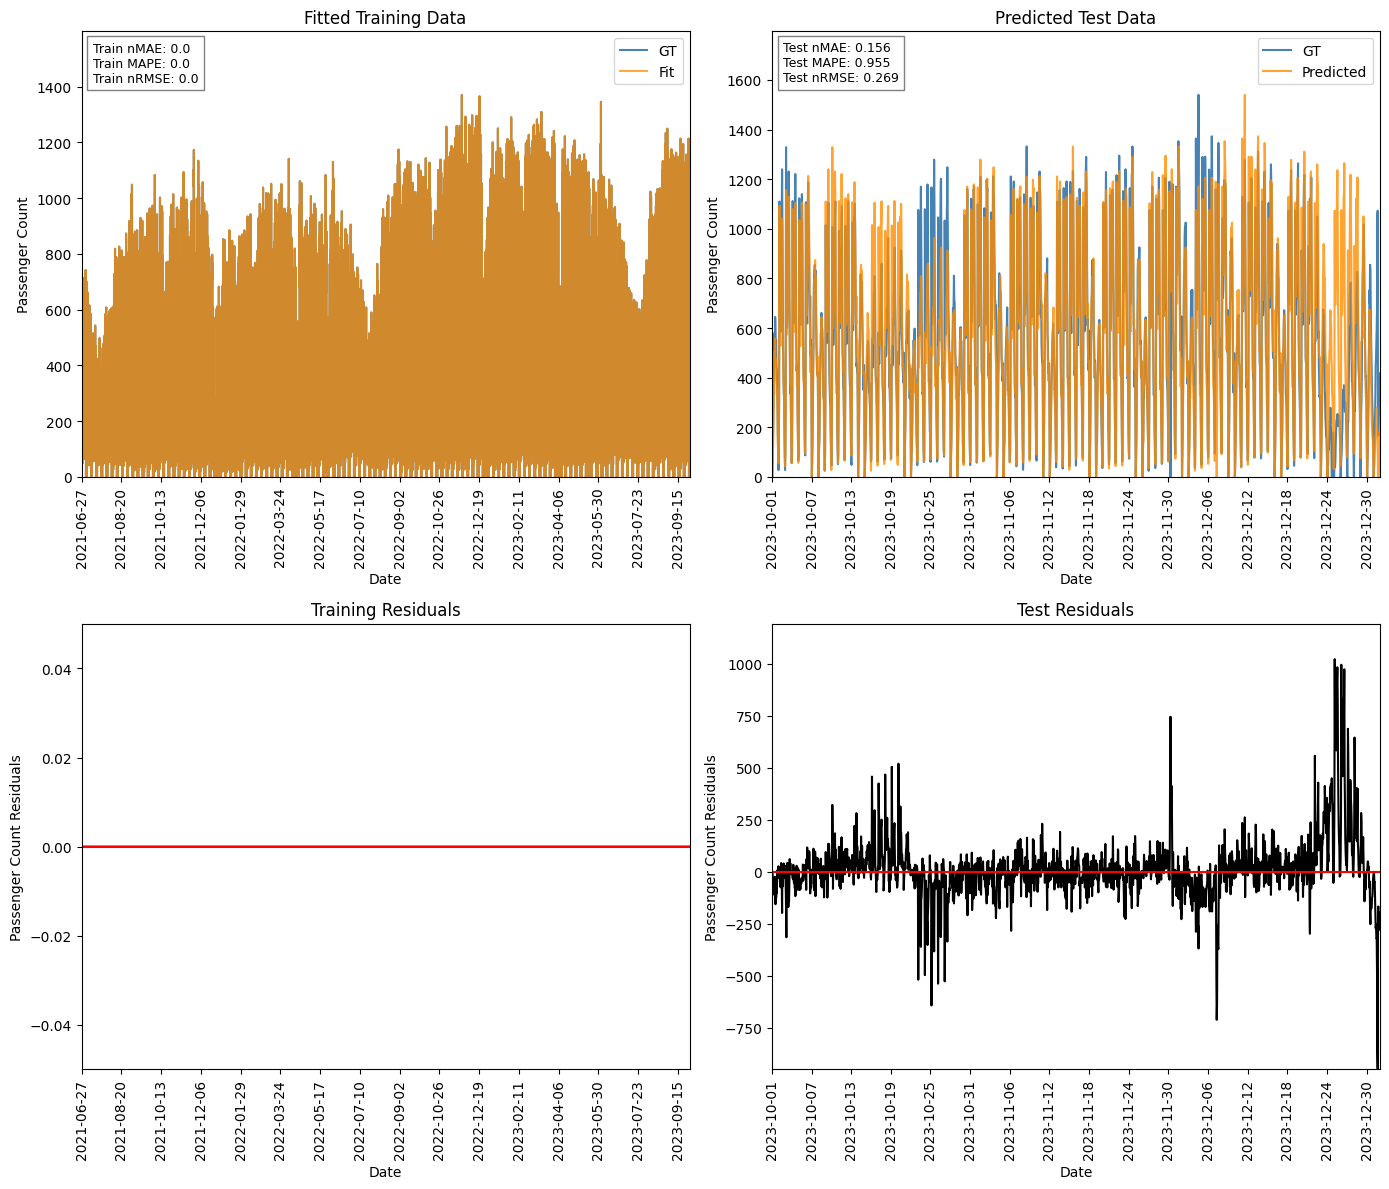

In [18]:
# robust to longer horizons
from sktime.forecasting.naive import NaiveForecaster

model = NaiveForecaster(strategy='last', sp=139)

y_val_pred = np.array([])
horizon = 40
for i in range(0, y_val.shape[0], horizon):
    subset = pd.concat([y_train, y_val[:i]])
    model.fit(subset)
    pred = model.predict(fh=[j for j in range(min(horizon, y_val.shape[0] - i))])
    y_val_pred = np.append(y_val_pred, pred)

utils.tools.plotFitAndPredictions(y_train_pred=y_train, y_test_pred=y_val_pred,
                                  y_train_true=y_train, y_test_true=y_val,
                                  dates=True, trainDateCol=df_train['date'], testDateCol=df_val['date'])


Execution time: 0.003 sec


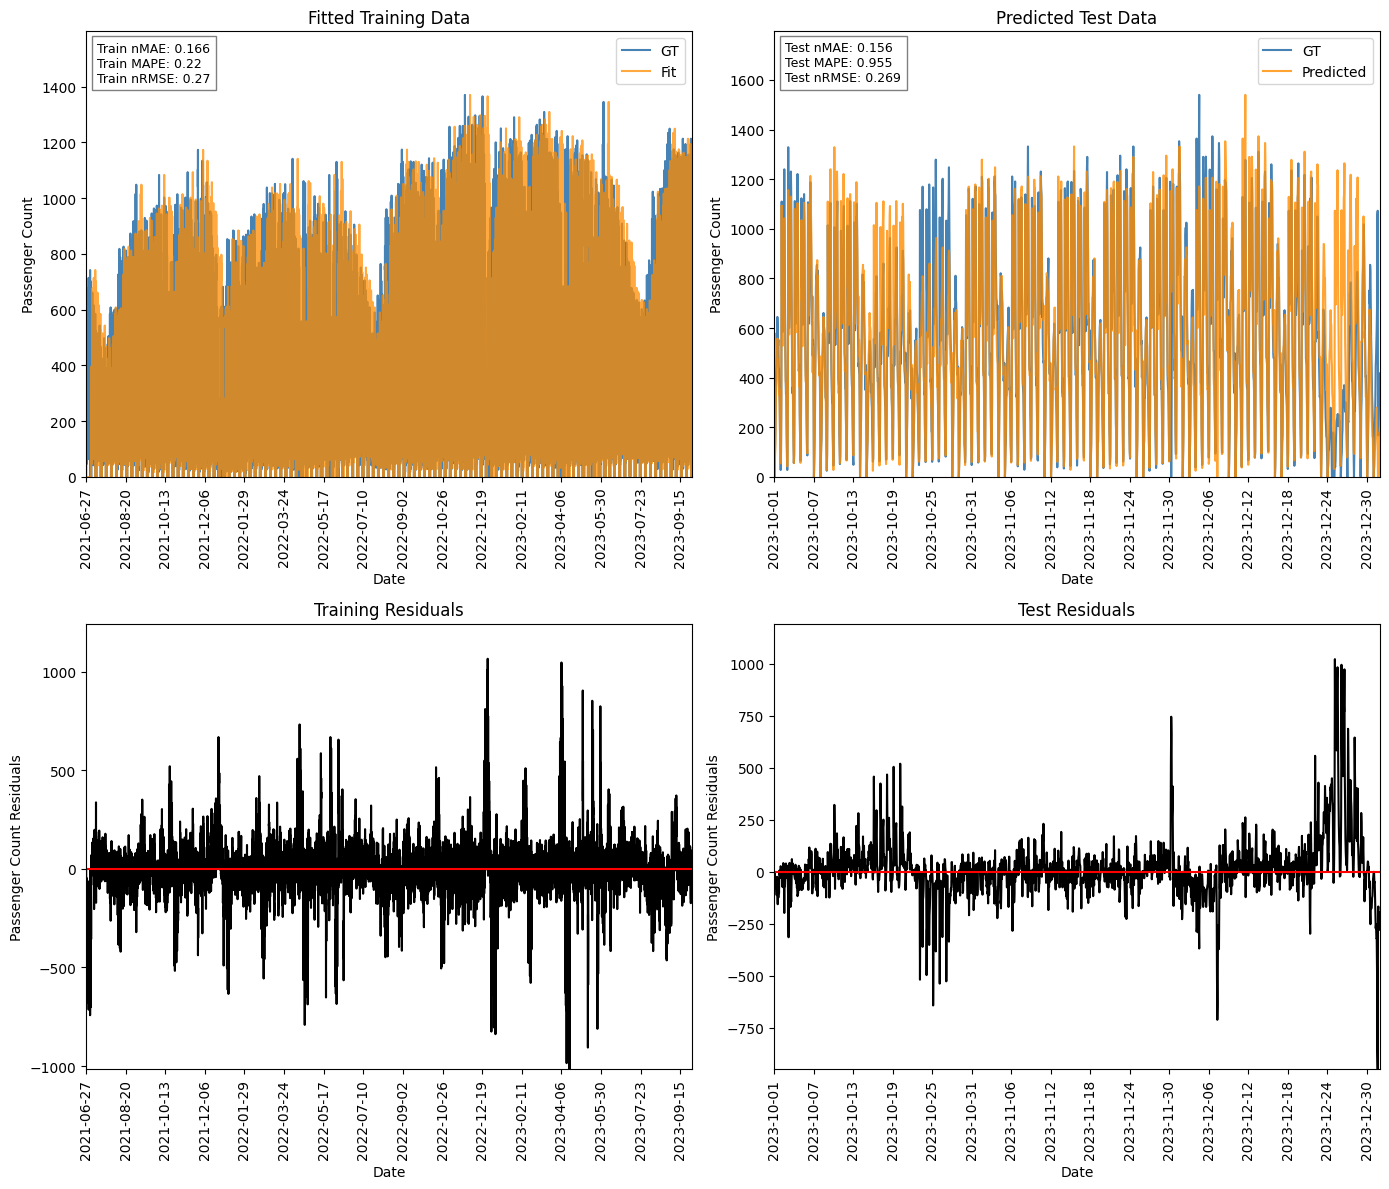

In [16]:
# non diff
lookback = 140*agg # 140 * amount of observations per hour

timer = Time()
timer.start()
# same as past 140th observation
y_train_pred = y_train.shift(periods=lookback).fillna(0)
# concat train and val so lags are possible. Find same as past 140th observation.
y_val_pred = pd.concat([y_train, y_val]).shift(periods=lookback).fillna(0)[y_val.index]
print(timer.end())

# round and cut off train and val predictions
y_train_pred = y_train_pred.round()
y_train_pred[y_train_pred < 0] = 0
y_val_pred = y_val_pred.round()
y_val_pred[y_val_pred < 0] = 0


utils.tools.plotFitAndPredictions(y_train_pred=y_train_pred, y_test_pred=y_val_pred,
                                  y_train_true=y_train, y_test_true=y_val,
                                  dates=True, trainDateCol=df_train['date'], testDateCol=df_val['date'])

Execution time: 0.050 sec


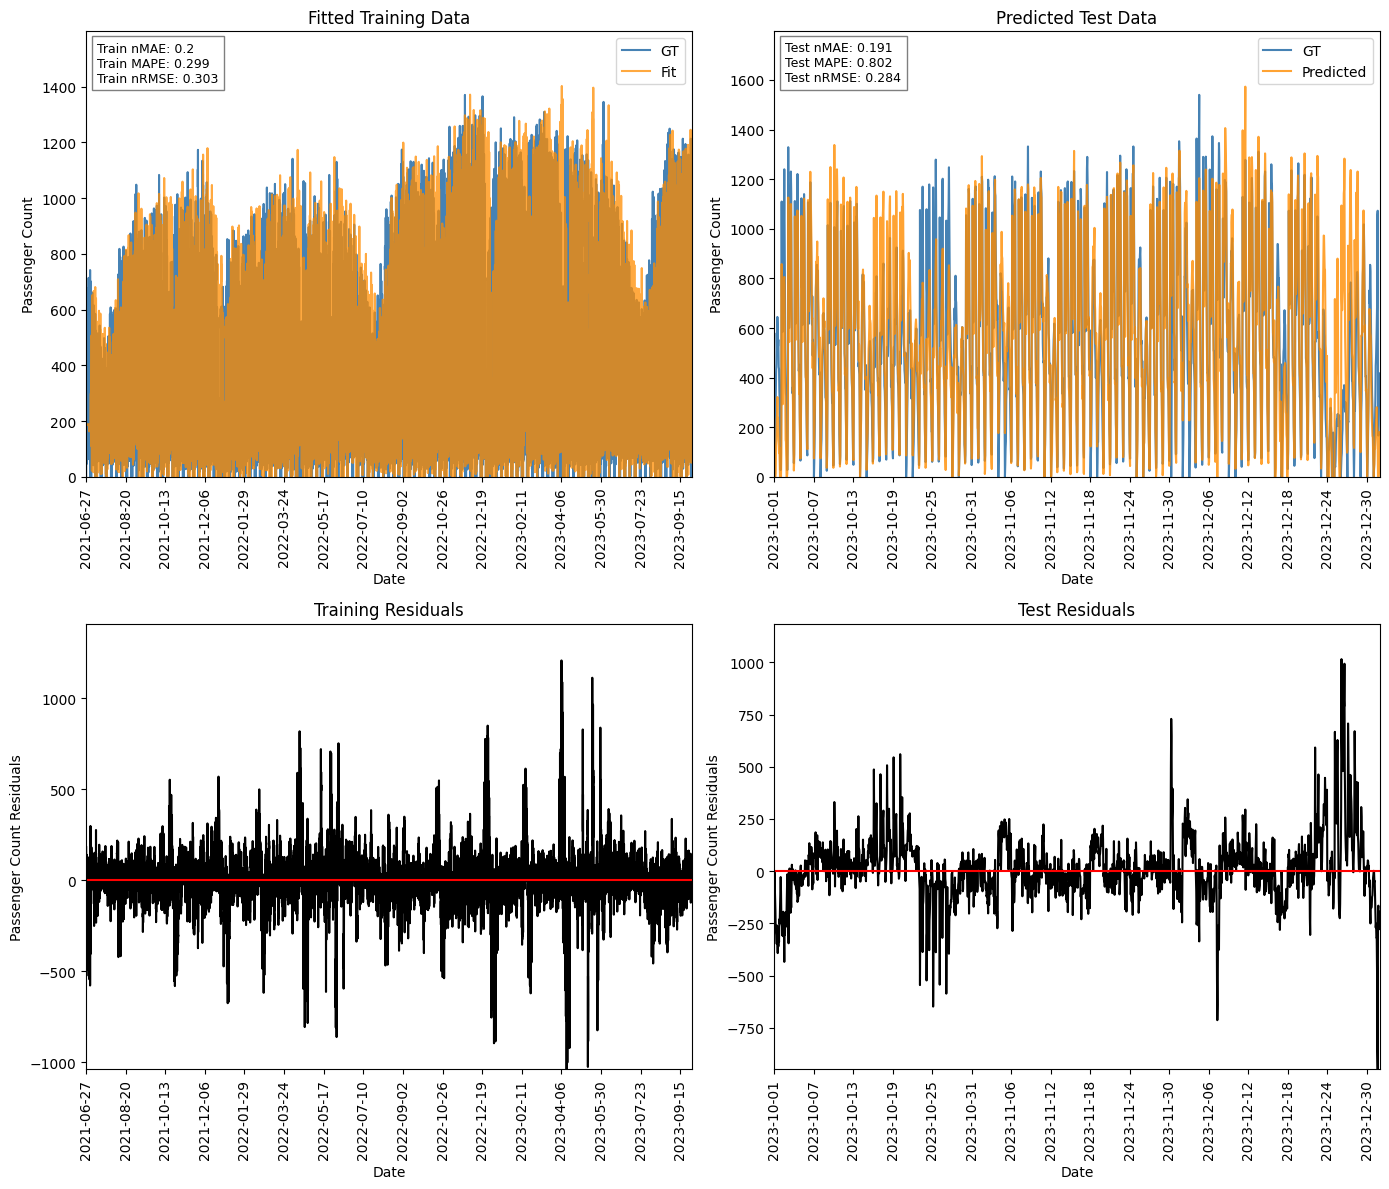

In [20]:
# 1 diff
lookback = 140*agg # 140 * amount of observations per hour

timer = Time()
timer.start()

# same as past 140th observation
y_train_diff = utils.tools.difference(y_train)
y_train_diff_pred = y_train_diff.shift(periods=lookback).fillna(0)
y_train_pred = utils.tools.inverseDifferencing(y_pred_diff=y_train_diff_pred, y_true=y_train, horizon=40)

# concat train and val so lags are possible. Find same as past 140th observation.
y_combined = pd.concat([y_train, y_val])
y_val_diff = utils.tools.difference(y_combined)
y_val_diff_pred = y_val_diff.shift(periods=lookback).fillna(0)[y_val.index]
y_val_pred = utils.tools.inverseDifferencing(y_pred_diff=y_val_diff_pred, y_true=y_val, horizon=40)
print(timer.end())


# round and cut off train and val predictions
y_train_pred = y_train_pred.round()
y_train_pred[y_train_pred < 0] = 0
y_val_pred = y_val_pred.round()
y_val_pred[y_val_pred < 0] = 0


utils.tools.plotFitAndPredictions(y_train_pred=y_train_pred, y_test_pred=y_val_pred,
                                  y_train_true=y_train, y_test_true=y_val,
                                  dates=True, trainDateCol=df_train['date'], testDateCol=df_val['date'])

# Lasso

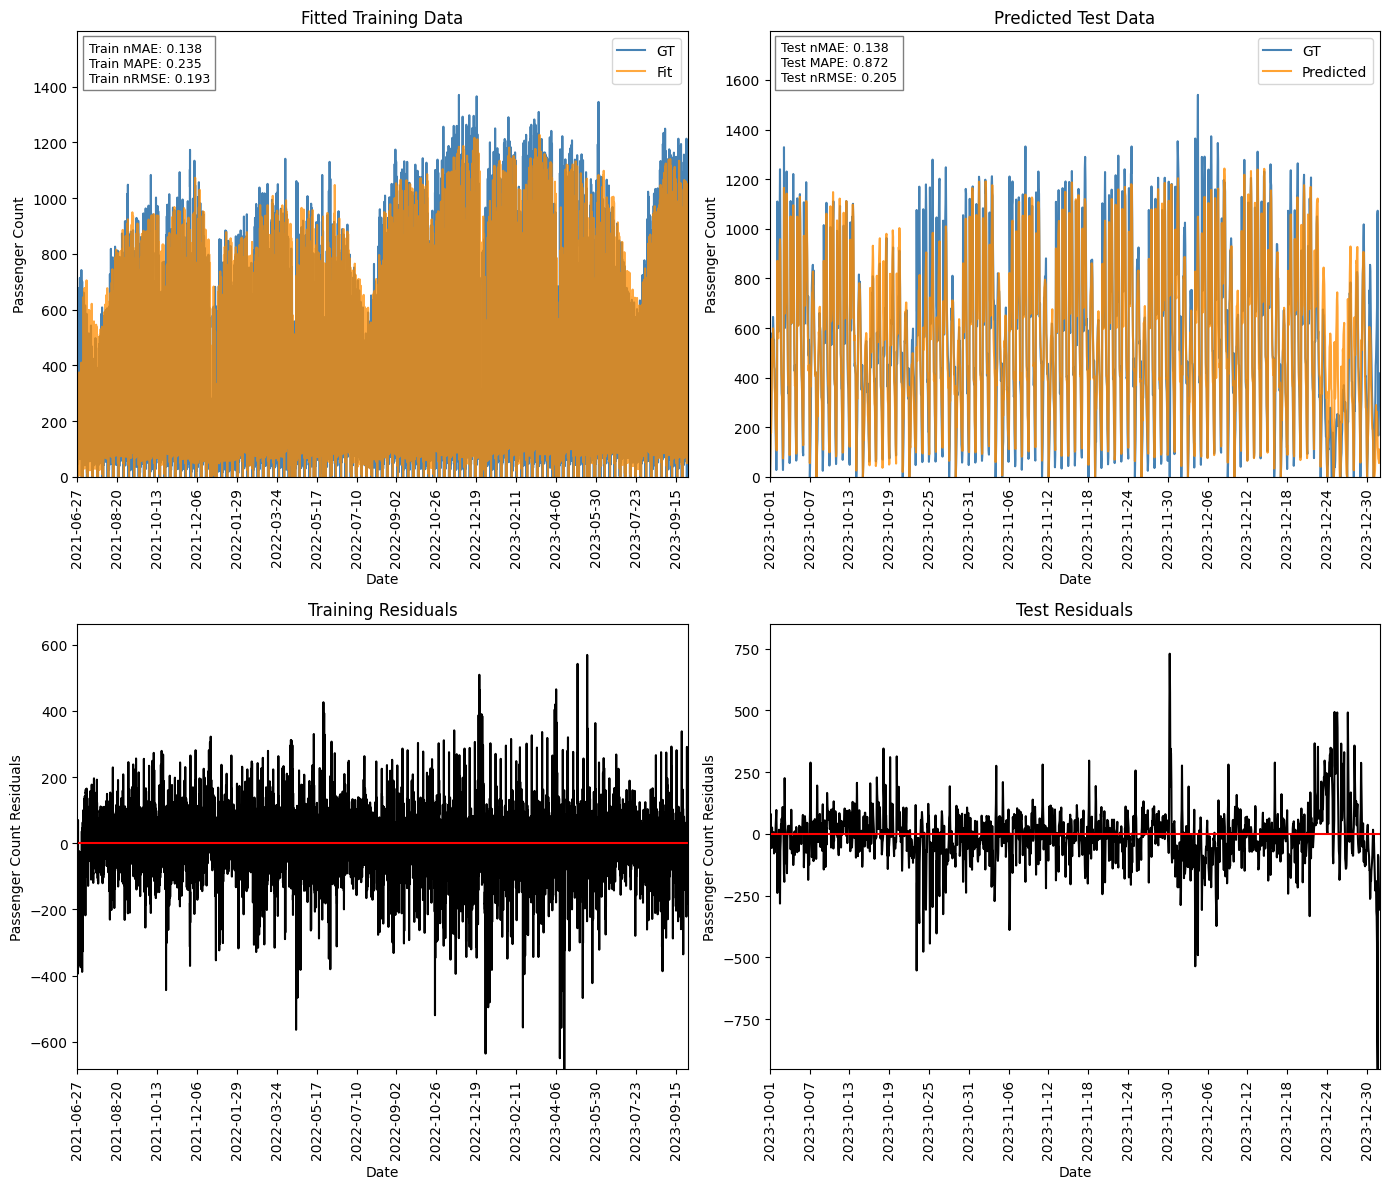

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [4]:
# fixed window 40 hours ahead
horizon = 40*agg

# best 60 min without diff
lags = [20*agg, 40*agg, 60*agg, 80*agg, 100*agg, 120*agg, 140*agg]
differentiation = None
alpha = 0.005

# best 60 min with diff
#lags = [1, 20, 140]
#differentiation = 1
#alpha = 0.005

model = Lasso(alpha=alpha, fit_intercept=True, max_iter=1000)
scalar = StandardScaler()
exog_scalar = StandardScaler()

window_type = 'fixed'
window_size = None#X_train.shape[0]
use_exog = True
interval = None#[25, 75]

model, y_train_pred, y_val_pred = utils.Sklearn.sklearnForecast(
    differentiation=differentiation, lags=lags, window_type=window_type, window_size=window_size,
    interval=interval, horizon=horizon, 
    use_exog=use_exog, scalar=scalar, exog_scalar=exog_scalar,
    X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, model=model)

utils.tools.plotFitAndPredictions(y_train_pred=y_train_pred, y_test_pred=y_val_pred,
                                  y_train_true=y_train, y_test_true=y_val,
                                  y_test_lower=None, y_test_upper=None,
                                  dates=True, trainDateCol=df_train['date'], testDateCol=df_val['date'])

# Use statsmodels to perform OLS regression and output summary
X_train_lagged = X_train.copy(deep=True)
if lags:
    for lag in lags:
        X_train_lagged[f'lag_{lag}'] = y_train.shift(periods=lag).fillna(0)
ols_model = sm.OLS(y_train, sm.add_constant(X_train_lagged)).fit()
print(ols_model.summary())

plt.barh(X_train_lagged.columns, model.coef_)
plt.title('Lasso coefficients')
plt.show()

# Lasso grid search

In [6]:
horizon = 40*agg
window_list = ['fixed']
scalar = StandardScaler()
exog_scalar = StandardScaler()

for window_type in window_list:
    for useLags in [False, True]:
        for dropCalendar in [True, False]:
            for dropWeather in [True, False]:
                for diff in [1, None]:
                    if useLags == False and dropCalendar == True and dropWeather == True:
                        break

                    X_train = utils.DataSplitter.subsetColumns(df_train, dropCategorical=True, dropLags=True, 
                                                               dropWeather=dropWeather, dropCalendar=dropCalendar, 
                                                               dropSpecific=[target, Columns.calendar_Q1.value, Columns.calendar_mon.value]) # avoid multicolinearity

                    X_val = utils.DataSplitter.subsetColumns(df_val, dropCategorical=True, dropLags=True, 
                                                             dropWeather=dropWeather, dropCalendar=dropCalendar, 
                                                             dropSpecific=[target, Columns.calendar_Q1.value, Columns.calendar_mon.value]) # avoid multicolinearity

                    if useLags:
                        laglist = [[1], [4], [8], [20], [40], [60], [80], [100], [120], [140],
                                   [1, 20, 140], 
                                   [1, 4, 8, 20],
                                   [1, 10, 20, 140],
                                   [1, 4, 8, 20, 140],
                                   [20, 40, 60, 80, 100, 120, 140],
                                   [1, 20, 40, 60, 80, 100, 120, 140]]
                        laglist = [[i*agg for i in templist] for templist in laglist]
                    else:
                        laglist = [None]
                    
                    if window_type == 'rolling':
                        window_size = X_train.shape[0]
                    else:
                        window_size = None
                    
                    use_exog = True if dropCalendar == False or dropWeather == False else False

                    bestMAE = 1000000
                    # begin grid search
                    for alpha in [0.1, 0.05, 0.01, 0.005]:
                        for lags in laglist:
                            model = Lasso(alpha=alpha, fit_intercept=True, max_iter=1000)
                            model, y_train_pred, y_val_pred = utils.Sklearn.sklearnForecast(
                                    differentiation=diff, lags=lags, window_type=window_type, window_size=window_size,
                                    horizon=horizon, use_exog=use_exog, scalar=scalar, exog_scalar=exog_scalar,
                                    X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, model=model, interval=None)

                            trainMAE = nMAE(y=y_train, yhat=y_train_pred)
                            valMAE = nMAE(y=y_val, yhat=y_val_pred)
                            if valMAE < bestMAE:
                                bestMAE = valMAE
                                best_model = model
                                best_lags = lags
                                best_alpha = alpha
                                best_y_train_pred = y_train_pred
                                best_y_val_pred = y_val_pred
                    # end grid search
                    
                    trainMAE = nMAE(y=y_train, yhat=best_y_train_pred)
                    valMAE = nMAE(y=y_val, yhat=best_y_val_pred)
                    trainMAPE = MAPE(y=y_train, yhat=best_y_train_pred)
                    valMAPE = MAPE(y=y_val, yhat=best_y_val_pred)
                    trainRMSE = nRMSE(y=y_train, yhat=best_y_train_pred)
                    valRMSE = nRMSE(y=y_val, yhat=best_y_val_pred)
                    with open(f"hyperparameterSearch/{model.__class__.__name__}GridSearch.txt", "a") as f:
                        f.write(f"Window: {window_type}, Line: {line}, Lags: {useLags}, Drop C: {dropCalendar}, Drop W: {dropWeather}, Diff: {diff}\n")
                        f.write("Best hyperparameters:\n")
                        f.write(f"lags: {best_lags}\n")
                        f.write(f"alpha L1: {best_alpha}\n")
                        f.write(f"Train metrics:\n")
                        f.write(f"nMAE: {trainMAE}, MAPE: {trainMAPE}, nRMSE: {trainRMSE}\n")
                        f.write(f"Val metrics:\n")
                        f.write(f"nMAE: {valMAE}, MAPE: {valMAPE}, nRMSE: {valRMSE}\n")
                        f.write("------------------------------------------------------------------------------\n")

1A 60min:

Diff=None

$$
\begin{array}{c|c|c}
Model & \alpha & Lags\\
\hline
FLassoW   & 0.01 & None\\
\hline
FLassoC   & 0.05 & None\\
\hline
FLassoCW  & 0.005 & None\\
\hline
FLassoL   & 0.005 & [20, 40, 60, 80, 100, 120, 140]\\
\hline
FLassoLW  & 0.005 & [20, 40, 60, 80, 100, 120, 140]\\
\hline
FLassoLC  & 0.005 & [20, 40, 60, 80, 100, 120, 140]\\
\hline
FLassoLCW & 0.005 & [20, 40, 60, 80, 100, 120, 140]\\
\end{array}
$$


Diff=1

$$
\begin{array}{c|c|c}
Model & \alpha & Lags\\
\hline
FLassoW   & 0.05 & None\\
\hline
FLassoC   & 0.01 & None\\
\hline
FLassoCW  & 0.005 & None\\
\hline
FLassoL   & 0.005 & [140]\\
\hline
FLassoLW  & 0.005 & [140]\\
\hline
FLassoLC  & 0.005 & [1, 10, 20, 140]\\
\hline
FLassoLCW & 0.005 & [1, 10, 20, 140]\\
\end{array}
$$

# Skforecast implementation (always requires lags)

In [2]:
# for testing
level = 60
line = Columns.line_1A.value
target = Columns.target_passengersBoarding.value

if level == 60:
    agg = 1
elif level == 30:
    agg = 2
elif level == 15:
    agg = 4

df_level = utils.DataSplitter.getTrainData(agglevel=level, diff=False, hours_to_exclude=[])
df_train = df_level[df_level['line'] == line]


X_train = utils.DataSplitter.subsetColumns(df_train, dropCategorical=True, dropLags=True, dropWeather=False, dropCalendar=False, 
                                           dropSpecific=[target])
y_train = df_train[target]

df_train.index = pd.RangeIndex(start=0, stop=df_train.shape[0])
X_train.index = df_train.index
y_train.index = df_train.index


df_level_test = utils.DataSplitter.getTestData(agglevel=level, diff=False, hours_to_exclude=[])
df_val = df_level_test[df_level_test['line'] == line]

X_val = utils.DataSplitter.subsetColumns(df_val, dropCategorical=True, dropLags=True, dropWeather=False, dropCalendar=False, 
                                           dropSpecific=[target])
y_val = df_val[target]

df_val.index = pd.RangeIndex(start = X_train.shape[0], stop = X_train.shape[0] + X_val.shape[0])
X_val.index = df_val.index
y_val.index = df_val.index


print(all(X_train.columns == X_val.columns))
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)
print(X_train.columns)

/Users/andreasskibyandersen/Documents/Github/Machine-Learning-Passenger-Forecasting/utils/DataSplitter.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'hour_{hour}'] = df[Columns.categorical_hour.value].apply(lambda x: 1 if x == hour else 0)
/Users/andreasskibyandersen/Documents/Github/Machine-Learning-Passenger-Forecasting/utils/DataSplitter.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'hour_{hour}'] = df[Columns.categorical_hour.value].apply(lambda x: 1 if x == hour else 0)
/Users/a

True
(19824, 65) (19824,) (2208, 65) (2208,)
Index(['peakHour', 'Q1', 'Q2', 'Q3', 'Q4', 'mon', 'tue', 'wed', 'thu', 'fri',
       'sat', 'sun', 'workdayPlan', 'saturdayPlan', 'sundayAndHolidayPlan',
       'summerVacation', 'fallVacation', 'christmasVacation', 'winterVacation',
       'easterVacation', 'acc_precip', 'bright_sunshine', 'mean_cloud_cover',
       'mean_pressure', 'mean_relative_hum', 'mean_temp', 'mean_wind_speed',
       'snow_depth', 'event', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')


/Users/andreasskibyandersen/Documents/Github/Machine-Learning-Passenger-Forecasting/utils/DataSplitter.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'hour_{hour}'] = df[Columns.categorical_hour.value].apply(lambda x: 1 if x == hour else 0)
/Users/andreasskibyandersen/Documents/Github/Machine-Learning-Passenger-Forecasting/utils/DataSplitter.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'hour_{hour}'] = df[Columns.categorical_hour.value].apply(lambda x: 1 if x == hour else 0)
/Users/a

100%|██████████| 46/46 [00:00<00:00, 59.38it/s]


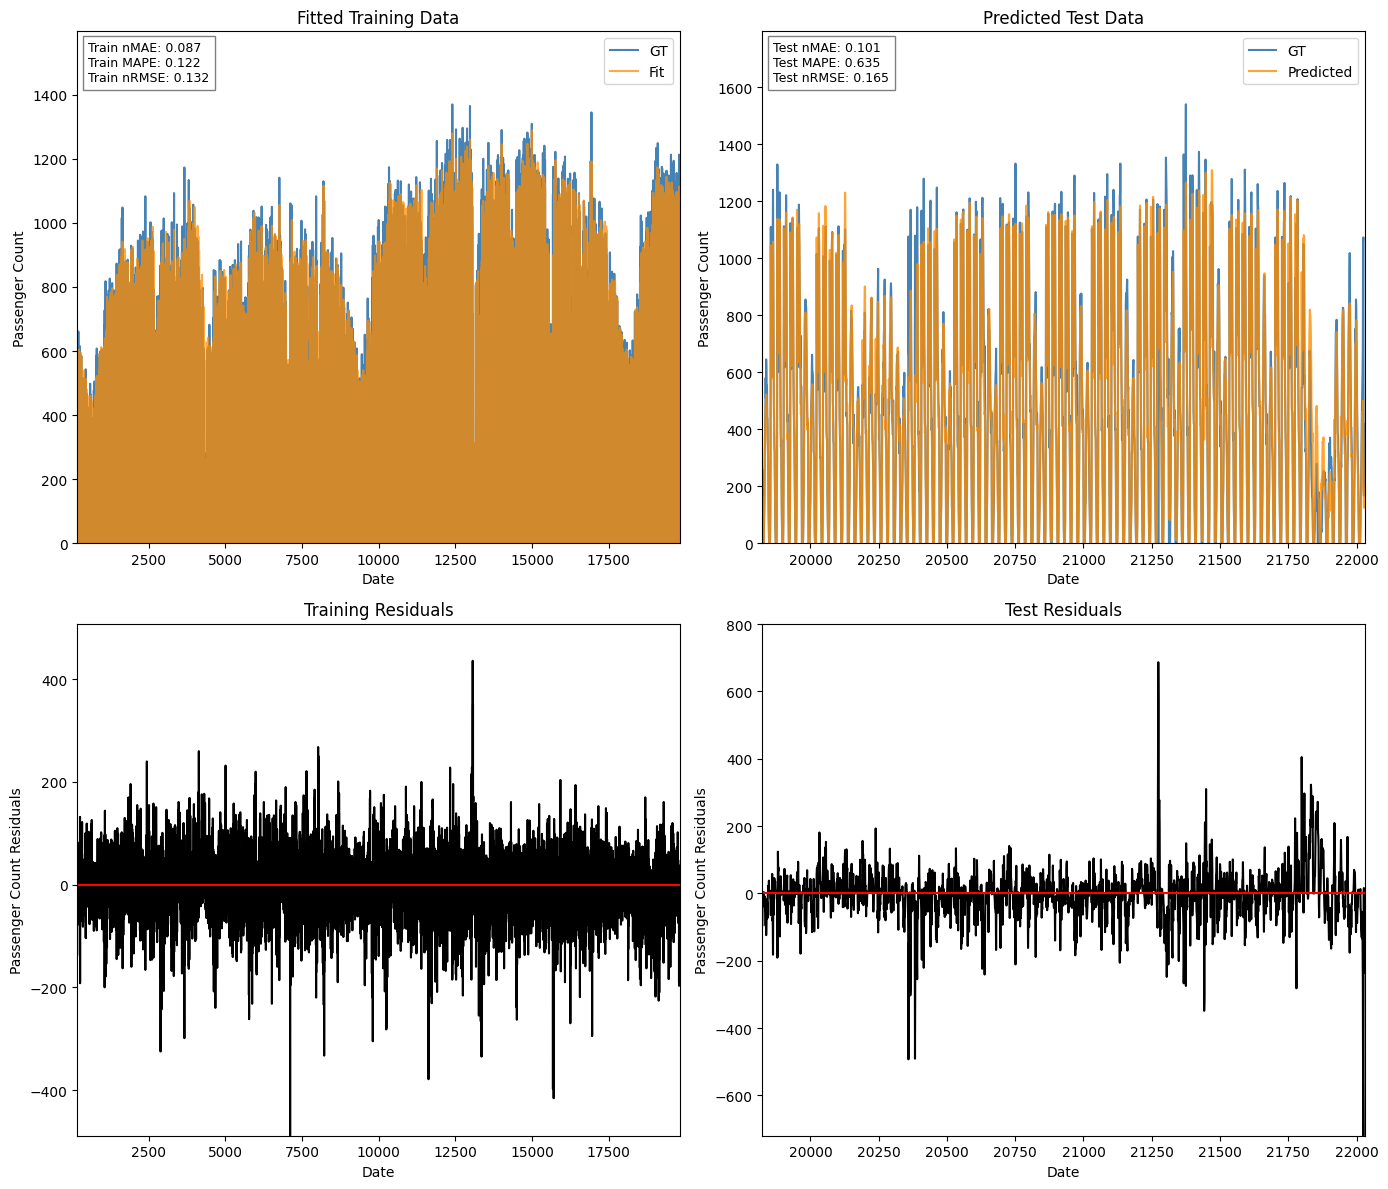

In [5]:
from skforecast.model_selection import backtesting_forecaster
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterBaseline import ForecasterEquivalentDate
from xgboost import XGBRegressor

#forecaster = ForecasterEquivalentDate(offset=140)

#forecaster = ForecasterAutoreg(
#                 regressor          = Lasso(alpha=0.005, random_state=42),
#                 lags               = [20, 40, 60, 80, 100, 120, 140],
#                 differentiation    = None,
#                 transformer_y      = StandardScaler(),
#                 transformer_exog   = StandardScaler()
#             )

day_samples = 24
horizon = day_samples*2

model = XGBRegressor(n_estimators=100, eta=0.1, alpha=0.1, random_state=42)

lags = list(range(1, 7+1))
max_lag = max(lags)
lags = [day_samples*i for i in lags]

forecaster = ForecasterAutoreg(
                 regressor          = model,
                 lags               = lags,
                 differentiation    = None,
                 transformer_y      = StandardScaler(),
                 transformer_exog   = StandardScaler()
             )

forecaster.fit(y=y_train, exog=X_train)

metric, y_train_pred = backtesting_forecaster(
                          forecaster            = forecaster,
                          y                     = y_train,
                          exog                  = X_train,
                          steps                 = horizon,
                          metric                = 'mean_squared_error',
                          initial_train_size    = None,
                          refit                 = False,
                          show_progress         = True
                      )

metric, y_val_pred = backtesting_forecaster(
                          forecaster            = forecaster,
                          y                     = pd.concat([y_train, y_val]),
                          exog                  = pd.concat([X_train, X_val]),
                          steps                 = horizon,
                          metric                = 'mean_squared_error',
                          initial_train_size    = X_train.shape[0],
                          fixed_train_size      = False, # expanding window
                          refit                 = True, # refit
                          gap                   = 0,
                          allow_incomplete_fold = True,
                          show_progress         = True
                      )

y_train_pred = round(y_train_pred['pred'])
y_train_pred[y_train_pred < 0] = 0
y_val_pred = round(y_val_pred['pred'])
y_val_pred[y_val_pred < 0] = 0

utils.tools.plotFitAndPredictions(y_train_pred=y_train_pred, y_test_pred=y_val_pred,
                                  y_train_true=y_train[day_samples*max_lag:], y_test_true=y_val,
                                  y_test_lower=None, y_test_upper=None,
                                  dates=False, trainDateCol=[], testDateCol=[])

# Prophet

In [ ]:
# for testing
level = 60
line = Columns.line_1A.value
target = Columns.target_passengersBoarding.value

if level == 60:
    agg = 1
elif level == 30:
    agg = 2
elif level == 15:
    agg = 4

df_level = utils.DataSplitter.getTrainData(agglevel=level, diff=False, hours_to_exclude=[])
df_train = df_level[df_level['line'] == line]


X_train = utils.DataSplitter.subsetColumns(df_train, dropCategorical=False, dropLags=True, dropWeather=False, dropCalendar=False, 
                                           dropSpecific=[target])
y_train = df_train[target]

df_train.index = pd.RangeIndex(start=0, stop=df_train.shape[0])
X_train.index = df_train.index
y_train.index = df_train.index


df_level_test = utils.DataSplitter.getTestData(agglevel=level, diff=False, hours_to_exclude=[])
df_val = df_level_test[df_level_test['line'] == line]

X_val = utils.DataSplitter.subsetColumns(df_val, dropCategorical=False, dropLags=True, dropWeather=False, dropCalendar=False, 
                                           dropSpecific=[target])
y_val = df_val[target]

df_val.index = pd.RangeIndex(start = X_train.shape[0], stop = X_train.shape[0] + X_val.shape[0])
X_val.index = df_val.index
y_val.index = df_val.index


print(all(X_train.columns == X_val.columns))
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)
print(X_train.columns)

In [ ]:
from copy import deepcopy
from pandas.tseries.offsets import Hour
X_train.index = pd.DatetimeIndex(X_train.datetime, freq=Hour())
X_train = X_train.drop(columns=[var.value for var in Columns if var.name.split('_')[0] == 'categorical' and var.name.split('_')[1] != 'minute'])
y_train.index = deepcopy(X_train.index)

X_val.index = pd.DatetimeIndex(X_val.datetime, freq=Hour())
X_val = X_val.drop(columns=[var.value for var in Columns if var.name.split('_')[0] == 'categorical' and var.name.split('_')[1] != 'minute'])
y_val.index = deepcopy(X_val.index)

cmdstanpy  DEBUG input tempfile: /var/folders/93/9bwp5y9s6p925yjm6qkgky980000gn/T/tmpql1axb6w/2o5proa_.json
cmdstanpy  DEBUG input tempfile: /var/folders/93/9bwp5y9s6p925yjm6qkgky980000gn/T/tmpql1axb6w/luu690hb.json
cmdstanpy  DEBUG idx 0
cmdstanpy  DEBUG running CmdStan, num_threads: None
cmdstanpy  DEBUG CmdStan args: ['/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60155', 'data', 'file=/var/folders/93/9bwp5y9s6p925yjm6qkgky980000gn/T/tmpql1axb6w/2o5proa_.json', 'init=/var/folders/93/9bwp5y9s6p925yjm6qkgky980000gn/T/tmpql1axb6w/luu690hb.json', 'output', 'file=/var/folders/93/9bwp5y9s6p925yjm6qkgky980000gn/T/tmpql1axb6w/prophet_model9zmjdl93/prophet_model-20240630121636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:16:36 - cmdstanpy - INFO - Chain [1] start processing
cmdstanpy  INFO  Chain [1] start processing
12:16:55 - cmdstanpy - INFO - Chain [1] done processing
cmdstanpy  INFO 

0.172


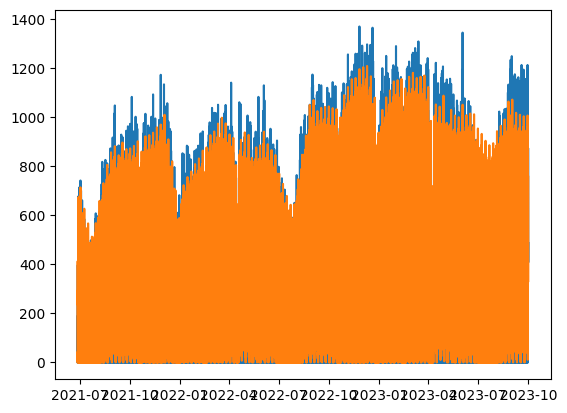

In [12]:
from sktime.forecasting.fbprophet import Prophet
model = Prophet(freq=Hour(), 
                daily_seasonality='auto', 
                weekly_seasonality='auto', 
                yearly_seasonality='auto',
                seasonality_mode='multiplicative',
                add_seasonality=[{'name':'peak_hour', 'period':(8/24), 'fourier_order':5}],
                add_country_holidays={'country_name':'DK'})

model.fit(y=y_train, X=X_train)
y_train_pred = model.predict(fh=range(-y_train.shape[0]+1, 1), X=X_train)
y_train_pred = y_train_pred.round()
y_train_pred[y_train_pred < 0] = 0

print(nMAE(y=y_train, yhat=y_train_pred))
plt.plot(y_train.index, y_train)
plt.plot(y_train.index, y_train_pred)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
0.179


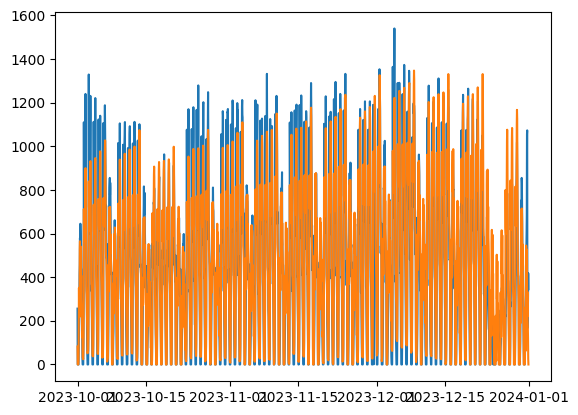

In [13]:
import logging
logging.getLogger("cmdstanpy").disabled = True

from pandas.tseries.offsets import DateOffset

y_val_pred = np.array([])
X_training = pd.concat([X_train, X_val])
y_training = pd.concat([y_train, y_val])
for i, index in enumerate(y_val.index[::horizon]):
    print(f'Iteration {i}')

    model.fit(y=y_training.loc[:index+DateOffset(hours=0)], X=X_training.loc[:index+DateOffset(hours=0)])

    predictions = model.predict(fh=range(0, horizon), X=X_training.loc[index:index + DateOffset(hours=horizon)])
    assert predictions.shape[0] == horizon

    y_val_pred = np.append(y_val_pred, predictions)

logging.getLogger("cmdstanpy").disabled = False

y_val_pred = np.round(y_val_pred)
y_val_pred[y_val_pred < 0] = 0
preds = pd.Series(y_val_pred, index=y_val.index)

print(nMAE(y=y_val, yhat=y_val_pred))
plt.plot(y_val.index, y_val)
plt.plot(y_val.index, y_val_pred)